# CSCI 5523 Final Project

By: Peter Genatempo, Will Teachout, Will Chan, Jack Johnson, & Lukas Buhler

## OVERVIEW

We want to be able to predict whether or not someone will get a positive response back from a landlord on an application based on their race and sex.  From this we can see the impact that residential laws had on reducing descrimination on applicants.

This is an important issue because housing discrimination affects many people, so many in fact that a law had to be passed to prevent it. This will illustrate both the degree of this discrimination and whether the passing of a law against it had an effect on it.

We hope to see the impact of the different variables on whether someone will get a positive or negative response. We are expecting Race and Gender to be very impactful on the response.

## DATA

Positive or negative (binary) responses to housing applications in MSP. With predictors consisting of the statistics of the rental unit as well as race and sex information on the applicant.

Credit: This dataset comes from research done by Dr. Deborah Rho (University of St. Thomas) and Marina Mileo Gorzig (Saint Catherine University).

In [64]:
# load packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [65]:
# import dataset
data = pd.read_csv('StatData.csv')

## EXPLORATORY DATA ANALYSIS

In [66]:
# check head
data.head()

,batch,Appnumber,Type,MonthlyRent,Size,RacialGroup,Sex,contact,Minneapolis,Law,Positive,StayAtHome
0,5,1,2,1000,One bedroom units,White American,Female,Positive contact,Minneapolis,0,1,0
1,5,2,2,1000,One bedroom units,White American,Male,Positive contact,Minneapolis,0,1,0
2,5,3,2,1000,One bedroom units,Somali American,Female,Positive contact,Minneapolis,0,1,0
3,6,1,2,1410,One bedroom units,White American,Male,Ghosted,St. Paul and suburbs,0,0,0
4,6,2,2,1410,One bedroom units,African American,Female,Positive contact,St. Paul and suburbs,0,1,0


In [67]:
# check shape of data
np.shape(data)

(5583, 12)

In [68]:
# description of numerical data
data.describe()

,batch,Appnumber,Type,MonthlyRent,Law,Positive,StayAtHome
count,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000,5583.000000
mean,854.912771,1.595916,2.611141,1527.976715,0.494895,0.357335,0.115708
std,683.738709,0.726524,1.107189,598.067114,0.500019,0.479258,0.319904
min,5.000000,1.000000,1.000000,475.000000,0.000000,0.000000,0.000000
25%,253.000000,1.000000,2.000000,1112.500000,0.000000,0.000000,0.000000
50%,613.000000,1.000000,2.000000,1400.000000,0.000000,0.000000,0.000000
75%,1505.500000,2.000000,4.000000,1795.000000,1.000000,1.000000,0.000000
max,2211.000000,3.000000,4.000000,6000.000000,1.000000,1.000000,1.000000


In [69]:
# ***we need to decide what to do with these null values***

# check for null values
data.isnull().values.any()

True

In [70]:
# check potential 'Size' values
data['Size'].unique()

array(['One bedroom units', 'Two or more bedrooms'], dtype=object)

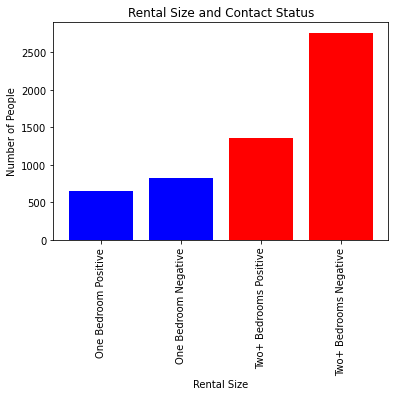

In [71]:
# collect frequencies for each group
one_positive = data[(data['Size'] == 'One bedroom units') & (data['Positive'] == 1)].count()
one_negative = data[(data['Size'] == 'One bedroom units') & (data['Positive'] == 0)].count()
more_positive = data[(data['Size'] == 'Two or more bedrooms') & (data['Positive'] == 1)].count()
more_negative = data[(data['Size'] == 'Two or more bedrooms') & (data['Positive'] == 0)].count()

# build plot
plt.bar('One Bedroom Positive', one_positive, color = 'b')
plt.bar('One Bedroom Negative', one_negative, color = 'b')
plt.bar('Two+ Bedrooms Positive', more_positive, color = 'r')
plt.bar('Two+ Bedrooms Negative', more_negative, color = 'r')
plt.title('Rental Size and Contact Status')
plt.xlabel('Rental Size')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

Something that we can see from this plot is that for single bedroom listings the number of positive and negative responses are fairly similar.  However, for listings with two or more bedrooms there are a greater number of negative contacts than there are positive.  This might be happening for a multitude of reasonse (higher demand and low supply, applicant with familiy, etc.) but it would be interesting to look more into this.

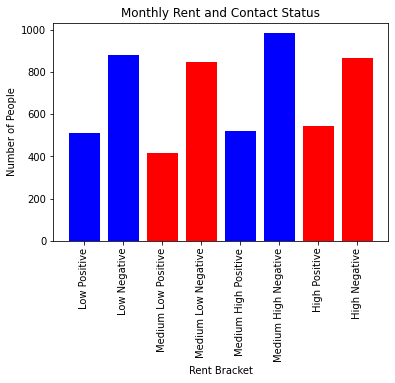

In [72]:
# collect frequencies for each group
# rent ranges are split between the 4 quartiles
low_positive = data[(data['MonthlyRent'] < 1112.5) & (data['Positive'] == 1)].count()
low_negative = data[(data['MonthlyRent'] < 1112.5) & (data['Positive'] == 0)].count()
medlow_positive = data[(data['MonthlyRent'] < 1400) & (data['MonthlyRent'] >= 1112.5) & (data['Positive'] == 1)].count()
medlow_negative = data[(data['MonthlyRent'] < 1400) & (data['MonthlyRent'] >= 1112.5) & (data['Positive'] == 0)].count()
medhigh_positive = data[(data['MonthlyRent'] < 1795) & (data['MonthlyRent'] >= 1400) & (data['Positive'] == 1)].count()
medhigh_negative = data[(data['MonthlyRent'] < 1795) & (data['MonthlyRent'] >= 1400) & (data['Positive'] == 0)].count()
high_positive = data[(data['MonthlyRent'] >= 1795) & (data['Positive'] == 1)].count()
high_negative = data[(data['MonthlyRent'] >= 1795) & (data['Positive'] == 0)].count()

# build the plot
plt.bar('Low Positive', low_positive, color = 'b')
plt.bar('Low Negative', low_negative, color = 'b')
plt.bar('Medium Low Positive', medlow_positive, color = 'r')
plt.bar('Medium Low Negative', medlow_negative, color = 'r')
plt.bar('Medium High Positive', medhigh_positive, color = 'b')
plt.bar('Medium High Negative', medhigh_negative, color = 'b')
plt.bar('High Positive', high_positive, color = 'r')
plt.bar('High Negative', high_negative, color = 'r')
plt.title('Monthly Rent and Contact Status')
plt.xlabel('Rent Bracket')
plt.ylabel('Number of People')
plt.xticks(rotation=90)
plt.show()

This plot is interesting because there doesn't appear to be a difference in response frequencies for the different ranges of rent.  Listings at the bottom end of the spectrum have almost identical positive and negative contact frequencies as the listings at the top of the spectrum.  This wasn't something that we were expecting to see from the data since we thought there would be more negatives for cheap listings and more positives for expensive listings.

In [73]:
# list potential 'contact' values
data['contact'].unique()

array(['Positive contact', 'Ghosted', 'Ambiguous contact',
       'Negative contact'], dtype=object)

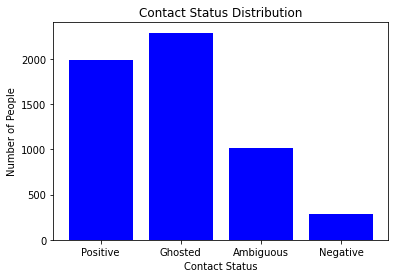

In [74]:
# collect contact frequencies
positive_contact = sum(data['contact'] == 'Positive contact')
ghosted_contact = sum(data['contact'] == 'Ghosted')
ambiguous_contact = sum(data['contact'] == 'Ambiguous contact')
negative_contact = sum(data['contact'] == 'Negative contact')

# build plot
plt.bar('Positive', positive_contact, color = 'b')
plt.bar('Ghosted', ghosted_contact, color = 'b')
plt.bar('Ambiguous', ambiguous_contact, color = 'b')
plt.bar('Negative', negative_contact, color = 'b')
plt.title('Contact Status Distribution')
plt.xlabel('Contact Status')
plt.ylabel('Number of People')
plt.show()

It makes sense to see that there are much more ghostings than 'ambiguous' or 'negative' contacts since landlords are likely to just ignore people if they aren't interested in renting to them.  We should check and see how 'ghosted' and 'ambiguous' are classified as either positive or negative.

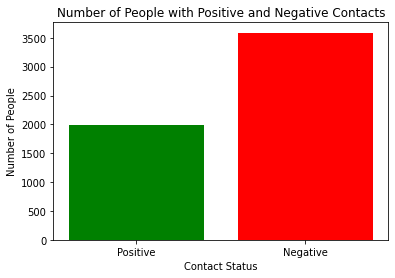

In [75]:
# collect group frequencies
positive_contact = sum(data['Positive'] == 1)
negative_contact = sum(data['Positive'] == 0)

# build plot
plt.bar('Positive', positive_contact, color = 'g')
plt.bar('Negative', negative_contact, color = 'r')
plt.title('Number of People with Positive and Negative Contacts')
plt.xlabel('Contact Status')
plt.ylabel('Number of People')
plt.show()

As we can see from this plot, we were able to see that both 'ambiguous' and 'ghosted' are labeled as negative contacts.  This is logical and produces a dataset with more negative than positive contacts.

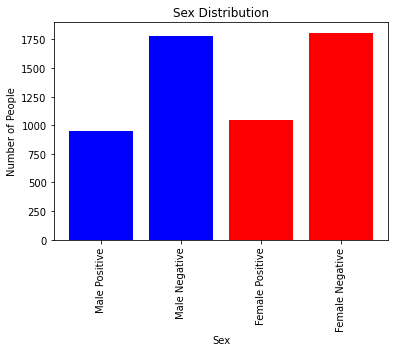

In [76]:
# collect group frequencies
male_pos = data[(data['Sex'] == 'Male') & (data['Positive'] == 1)].count()
male_neg = data[(data['Sex'] == 'Male') & (data['Positive'] == 0)].count()
female_pos = data[(data['Sex'] == 'Female') & (data['Positive'] == 1)].count()
female_neg = data[(data['Sex'] == 'Female') & (data['Positive'] == 0)].count()

# build plot
plt.bar('Male Positive', male_pos, color = 'b')
plt.bar('Male Negative', male_neg, color = 'b')
plt.bar('Female Positive', female_pos, color = 'r')
plt.bar('Female Negative', female_neg, color = 'r')
plt.title('Sex Distribution')
plt.xlabel('Sex')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Looking at this plot there doesn't seem to be any difference between the type of contact someone would get based on their sex.

In [77]:
# view racial group categories
data['RacialGroup'].unique()

array(['White American', 'Somali American', 'African American'],
      dtype=object)

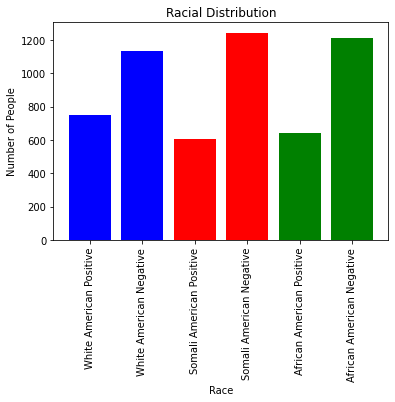

In [78]:
# collect group frequencies
wa_pos = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 1)].count()
wa_neg = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 0)].count()
sa_pos = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 1)].count()
sa_neg = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 0)].count()
aa_pos = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 1)].count()
aa_neg = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 0)].count()

# build plot
plt.bar('White American Positive', wa_pos, color = 'b')
plt.bar('White American Negative', wa_neg, color = 'b')
plt.bar('Somali American Positive', sa_pos, color = 'r')
plt.bar('Somali American Negative', sa_neg, color = 'r')
plt.bar('African American Positive', aa_pos, color = 'g')
plt.bar('African American Negative', aa_neg, color = 'g')
plt.title('Racial Distribution')
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Interestingly there doesn't look to be a significant difference between the three races and the frequency that they got positive and negative responses.

In [79]:
# view locations
data['Minneapolis'].unique()
# nan has 0 occurances (not sure why this shows up in options above)

array(['Minneapolis', 'St. Paul and suburbs', nan], dtype=object)

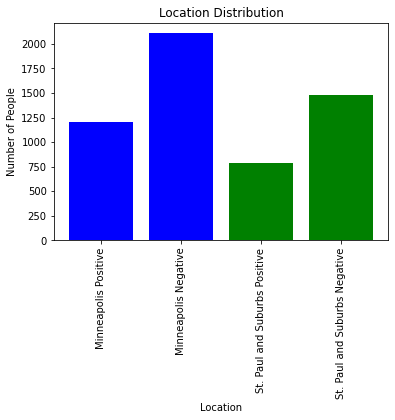

In [80]:
# collect group frequencies
mn_pos = data[(data['Minneapolis'] == 'Minneapolis') & (data['Positive'] == 1)].count()
mn_neg = data[(data['Minneapolis'] == 'Minneapolis') & (data['Positive'] == 0)].count()
sp_pos = data[(data['Minneapolis'] == 'St. Paul and suburbs') & (data['Positive'] == 1)].count()
sp_neg = data[(data['Minneapolis'] == 'St. Paul and suburbs') & (data['Positive'] == 0)].count()

# build plot
plt.bar('Minneapolis Positive', mn_pos, color = 'b')
plt.bar('Minneapolis Negative', mn_neg, color = 'b')
plt.bar('St. Paul and Suburbs Positive', sp_pos, color = 'g')
plt.bar('St. Paul and Suburbs Negative', sp_neg, color = 'g')
plt.title('Location Distribution')
plt.xlabel('Location')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Location doesn't seem to have any difference on cantacts either.

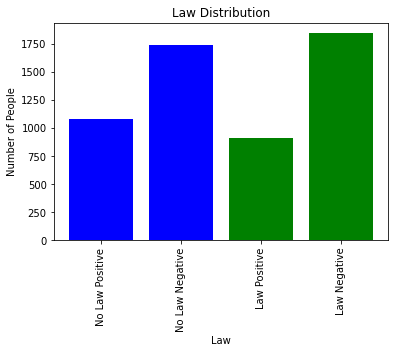

In [81]:
# collect group frequencies
nolaw_pos = data[(data['Law'] == 0) & (data['Positive'] == 1)].count()
nolaw_neg = data[(data['Law'] == 0) & (data['Positive'] == 0)].count()
law_pos = data[(data['Law'] == 1) & (data['Positive'] == 1)].count()
law_neg = data[(data['Law'] == 1) & (data['Positive'] == 0)].count()

# build plot
plt.bar('No Law Positive', nolaw_pos, color = 'b')
plt.bar('No Law Negative', nolaw_neg, color = 'b')
plt.bar('Law Positive', law_pos, color = 'g')
plt.bar('Law Negative', law_neg, color = 'g')
plt.title('Law Distribution')
plt.xlabel('Law')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

From this we can see that there isn't a change in the number of positive and negative contacts before and after the new law is passed.  What we should look at is if the type of people that get these responses has changed after the law is passed.

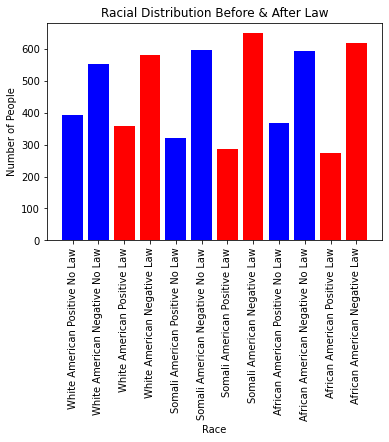

In [82]:
# collect group frequencies
wa_pos_nl = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 1) & (data['Law'] == 0)].count()
wa_neg_nl = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 0) & (data['Law'] == 0)].count()
wa_pos_l = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 1) & (data['Law'] == 1)].count()
wa_neg_l = data[(data['RacialGroup'] == 'White American') & (data['Positive'] == 0) & (data['Law'] == 1)].count()

sa_pos_nl = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 1) & (data['Law'] == 0)].count()
sa_neg_nl = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 0) & (data['Law'] == 0)].count()
sa_pos_l = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 1) & (data['Law'] == 1)].count()
sa_neg_l = data[(data['RacialGroup'] == 'Somali American') & (data['Positive'] == 0) & (data['Law'] == 1)].count()

aa_pos_nl = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 1) & (data['Law'] == 0)].count()
aa_neg_nl = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 0) & (data['Law'] == 0)].count()
aa_pos_l = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 1) & (data['Law'] == 1)].count()
aa_neg_l = data[(data['RacialGroup'] == 'African American') & (data['Positive'] == 0) & (data['Law'] == 1)].count()

# build plot
plt.bar('White American Positive No Law', wa_pos_nl, color = 'b')
plt.bar('White American Negative No Law', wa_neg_nl, color = 'b')
plt.bar('White American Positive Law', wa_pos_l, color = 'r')
plt.bar('White American Negative Law', wa_neg_l, color = 'r')

plt.bar('Somali American Positive No Law', sa_pos_nl, color = 'b')
plt.bar('Somali American Negative No Law', sa_neg_nl, color = 'b')
plt.bar('Somali American Positive Law', sa_pos_l, color = 'r')
plt.bar('Somali American Negative Law', sa_neg_l, color = 'r')

plt.bar('African American Positive No Law', aa_pos_nl, color = 'b')
plt.bar('African American Negative No Law', aa_neg_nl, color = 'b')
plt.bar('African American Positive Law', aa_pos_l, color = 'r')
plt.bar('African American Negative Law', aa_neg_l, color = 'r')

plt.title('Racial Distribution Before & After Law')
plt.xlabel('Race')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Passing the law doesn't look to have increased the frequency of positive contacts for any racial group.  All saw a decrease in positive contacts and an increase in negative contacts.  From this it doesn't look like the law had any effect on race.  Next lets look at gender to see if there was any change there.

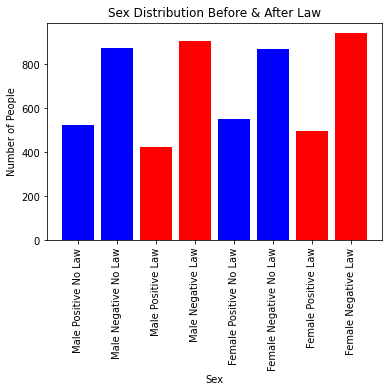

In [83]:
# collect group frequencies
m_pos_nl = data[(data['Sex'] == 'Male') & (data['Positive'] == 1) & (data['Law'] == 0)].count()
m_neg_nl = data[(data['Sex'] == 'Male') & (data['Positive'] == 0) & (data['Law'] == 0)].count()
m_pos_l = data[(data['Sex'] == 'Male') & (data['Positive'] == 1) & (data['Law'] == 1)].count()
m_neg_l = data[(data['Sex'] == 'Male') & (data['Positive'] == 0) & (data['Law'] == 1)].count()

fm_pos_nl = data[(data['Sex'] == 'Female') & (data['Positive'] == 1) & (data['Law'] == 0)].count()
fm_neg_nl = data[(data['Sex'] == 'Female') & (data['Positive'] == 0) & (data['Law'] == 0)].count()
fm_pos_l = data[(data['Sex'] == 'Female') & (data['Positive'] == 1) & (data['Law'] == 1)].count()
fm_neg_l = data[(data['Sex'] == 'Female') & (data['Positive'] == 0) & (data['Law'] == 1)].count()

# build plot
plt.bar('Male Positive No Law', m_pos_nl, color = 'b')
plt.bar('Male Negative No Law', m_neg_nl, color = 'b')
plt.bar('Male Positive Law', m_pos_l, color = 'r')
plt.bar('Male Negative Law', m_neg_l, color = 'r')

plt.bar('Female Positive No Law', fm_pos_nl, color = 'b')
plt.bar('Female Negative No Law', fm_neg_nl, color = 'b')
plt.bar('Female Positive Law', fm_pos_l, color = 'r')
plt.bar('Female Negative Law', fm_neg_l, color = 'r')

plt.title('Sex Distribution Before & After Law')
plt.xlabel('Sex')
plt.xticks(rotation=90)
plt.ylabel('Number of People')
plt.show()

Similar to race, gender saw a decrease in positive contacts after the law was passed.  Based on these two graphs it appears that the new law hand no effect on discrimination based on race and gender.

## MODELS

In [84]:
# discretize the dataset for better use in models
data['Size'] = data['Size'].replace(['One bedroom units'], 1, regex=True)
data['Size'] = data['Size'].replace(['Two or more bedrooms'], 2, regex=True)

data['RacialGroup'] = data['RacialGroup'].replace(['White American'], 0, regex=True)
data['RacialGroup'] = data['RacialGroup'].replace(['Somali American'], 1, regex=True)
data['RacialGroup'] = data['RacialGroup'].replace(['African American'], 2, regex=True)

data['Sex'] = data['Sex'].replace(['Male'], 0, regex=True)
data['Sex'] = data['Sex'].replace(['Female'], 1, regex=True)

data['contact'] = data['contact'].replace(['Positive contact'], 0, regex=True)
data['contact'] = data['contact'].replace(['Ghosted'], 1, regex=True)
data['contact'] = data['contact'].replace(['Ambiguous contact'], 2, regex=True)
data['contact'] = data['contact'].replace(['Negative contact'], 3, regex=True)


data['Minneapolis'] = data['Minneapolis'].replace(['Minneapolis'], 0, regex=True)
data['Minneapolis'] = data['Minneapolis'].replace(['St. Paul and suburbs'], 1, regex=True)
data['Minneapolis'] = data['Minneapolis'].replace(['nan'], 2, regex=True)

data.head()

,batch,Appnumber,Type,MonthlyRent,Size,RacialGroup,Sex,contact,Minneapolis,Law,Positive,StayAtHome
0,5,1,2,1000,1,0,1,0,0.0,0,1,0
1,5,2,2,1000,1,0,0,0,0.0,0,1,0
2,5,3,2,1000,1,1,1,0,0.0,0,1,0
3,6,1,2,1410,1,0,0,1,1.0,0,0,0
4,6,2,2,1410,1,2,1,0,1.0,0,1,0


In [85]:
# drop nan values
data = data.dropna()

# break dataset into features and target variable
x = data.drop('Positive', axis=1)
y = data['Positive']

# split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### K-Nearest Neighbors Classification Model

In [86]:
# create a generic kNN classifier
knn = KNeighborsClassifier(n_neighbors=1).fit(x_train, y_train)

In [87]:
# predict test values
y_pred = knn.predict(x_test)

# return accuracy of model
accuracy_score(y_test, y_pred)

0.7770814682184423